## Callin Switzer
## train NN with Jorge's new data
## 23 Aug 2018

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
sns.set(style="ticks")
import scipy.io
import subprocess
import csv
from matplotlib import cm

import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

#%qtconsole

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\mothMachineLearning_dataAndFigs\savedModels'
if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)

if not os.path.exists(savedModels):
    os.mkdir(savedModels)
    
# open file explorer
# aa = r'explorer /select,"'
# subprocess.Popen(str(aa + figDir + '\"'))
# subprocess.Popen(str(aa + dataDir + '\"'))

C:\Users\calli\Anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-09-26 08:36:56.852740


In [2]:
# import custom Utils functions
from DeepLearningUtils import *

TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-09-26 08:36:57.436572


In [4]:
dataDir2 = r"D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput"
dataFiles = [x for x in listdir_fullpath(dataDir2) if  x.endswith("con.hdf5")]
print(len(dataFiles))
dataFiles[0:5]

40


['D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_10_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_11_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_12_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_13_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_14_hws_am_con.hdf5']

In [5]:
dataDir

'D:\\MothSimulations\\11c-AggressiveManeuver\\Qstore\\hws_am_con'

In [6]:
Qmat = scipy.io.loadmat(os.path.join(dataDir, "Qstore_6_hws_am_con"+ ".mat"))

In [7]:
for timestep in range(100):
    if np.mod(timestep, 10) == 0: 
        print(timestep)
    vals = Qmat['Qstore'][timestep,0] #<-- set the array you want to access. 
    keys = Qmat['Qstore'][timestep,0].dtype.descr
    keys = np.array(keys)[:, 0]

# Assemble the keys and values into variables with the same name as that used in MATLAB
for i in range(len(keys)):
    key = keys[i]
    val = np.squeeze(vals[key][0])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
    exec(key + '=val')


0
10
20
30
40
50
60
70
80
90


In [8]:
keys

array(['ICs', 'F', 'alpha', 'tau0', 'bigQ', 'cost', 'NewICs', 'check'],
      dtype='<U6')

In [9]:
stt = time.time()
tt = np.zeros((100, 15))
bigF = np.zeros((100*2500*100, 15))
ctr = 0
for timestep in range(20):
    if np.mod(timestep, 10) == 0: 
        print(timestep)
    vals = Qmat['Qstore'][timestep,0] #<-- set the array you want to access. 
    keys = Qmat['Qstore'][timestep,0].dtype.descr
    keys = np.array(keys)[:, 0]

    # Assemble the keys and values into variables with the same name as that used in MATLAB
    for i in range(len(keys)):
        key = keys[i]
        val = np.squeeze(vals[key][0])  # squeeze is used to covert matlat (1,n) arrays into numpy (1,) arrays. 
        exec(key + '=val')

    for simNum in range(2500):
        #print(timestep, simNum)
        ttRows = tt.shape[0]
        tt[:, 0:8] = vals["bigQ"][0, simNum]
        tt[:, [8]] = np.repeat(np.concatenate(vals["F"][0]).ravel()[simNum], ttRows).reshape(-1,1)
        tt[:, [9]] = np.repeat(np.concatenate(vals["alpha"][0]).ravel()[simNum], ttRows).reshape(-1,1)
        tt[:, [10]] = np.repeat(np.concatenate(vals["tau0"][0]).ravel()[simNum], ttRows).reshape(-1,1)
        tt[:, [11]] =  np.repeat(simNum, ttRows).reshape(-1,1)
        tt[:, [12]] = np.repeat(timestep, ttRows).reshape(-1,1)
        tt[:, [13]] = np.repeat(np.concatenate(vals["cost"][0]).ravel()[simNum], ttRows).reshape(-1,1)
        tt[:, [14]] =  np.arange(0, ttRows).reshape(-1,1)
        bigF[ctr:ctr+ttRows, :] = tt
        ctr += ttRows

print(time.time() - stt )


0
10
103.99953007698059


In [10]:
tt2 = pd.DataFrame(bigF, columns=["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot", 
                                       "F", "alpha", "tau", "simNum", "timestep", "cost", "microStepNum"])

In [11]:
tt2.head()

,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot,F,alpha,tau,simNum,timestep,cost,microStepNum
0,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000,36465.642437,4.668924,-47005.904873,0.0,0.0,6.221005e+09,0.0
1,0.000192,-0.000254,0.784938,3.927014,2.803557,-3.412947,-2.984787,0.125907,36465.642437,4.668924,-47005.904873,0.0,0.0,6.221005e+09,1.0
2,0.001209,-0.001455,0.784319,3.927033,7.263879,-8.487641,-3.106328,0.062470,36465.642437,4.668924,-47005.904873,0.0,0.0,6.221005e+09,2.0
3,0.003133,-0.003690,0.783685,3.927039,11.751693,-13.595640,-3.175173,-0.004450,36465.642437,4.668924,-47005.904873,0.0,0.0,6.221005e+09,3.0
4,0.005957,-0.006950,0.783037,3.927031,16.235651,-18.705652,-3.245357,-0.071278,36465.642437,4.668924,-47005.904873,0.0,0.0,6.221005e+09,4.0


In [ ]:
t4 = tt2.loc[(tt2.timestep == 0.0 ) & (tt2.simNum == 0.0), : ]

VideoDir = os.path.join(figDir, "Video1")


if not os.path.exists(VideoDir):
    os.mkdir(VideoDir)


for ii in np.arange(1, len(t4.x)): 
    cols = np.arange(0, ii)
    cols = cols - (np.max(cols) - 5)

    cols[cols < 0 ] =  0
    cols = cols / (max(cols))

    colors = cm.viridis_r(cols)

    f, (ax ) = plt.subplots(1, 1, sharey=False, figsize=np.array([4,4]))
    ax.scatter(t4.x[0:ii], t4.y[0:ii], marker= "o", c= colors)
    ax.plot(t4.x[0:ii], t4.y[0:ii], linestyle = ":", color = "grey")
    ax.set_aspect('equal', 'datalim')
    f.tight_layout()
    f.savefig(os.path.join(VideoDir, str(ii) + ".png"))
    plt.close(f)
    #plt.show()


In [148]:
t4 = tt2.loc[(tt2.timestep == 10 ) & (tt2.simNum == 0.0), : ]

VideoDir = os.path.join(figDir, "Video2")


if not os.path.exists(VideoDir):
    os.mkdir(VideoDir)


for ii in np.arange(1, len(t4.x)): 
    cols = np.arange(0, ii)
    cols = cols - (np.max(cols) - 5)

    cols[cols < 0 ] =  0
    cols = cols / (max(cols))

    colors = cm.viridis_r(cols)

    f, (ax ) = plt.subplots(1, 1, sharey=False, figsize=np.array([4,4]))
    ax.scatter(t4.x[0:ii], t4.y[0:ii], marker= "o", c= colors)
    ax.plot(t4.x[0:ii], t4.y[0:ii], linestyle = ":", color = "grey")
    ax.set_xlim([np.min(t4.x) -0.2, np.max(t4.x) + 0.2])
    ax.set_ylim([np.min(t4.y) -0.2, np.max(t4.y) + 0.2])
    ax.set_aspect('equal', 'box')
    f.tight_layout()
    f.savefig(os.path.join(VideoDir, str(ii) + ".png"))
    plt.close(f)
    #plt.show()

In [12]:
# find minimum cost for each timestep

#remove 0's
tt2 = tt2.loc[~(tt2==0).all(axis=1)]

tt2.shape

(5000000, 15)

In [13]:
tmp = tt2.loc[tt2.groupby(["timestep"])["cost"].idxmin(), :]
tmp

,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot,F,alpha,tau,simNum,timestep,cost,microStepNum
141700,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000,14757.266800,0.594404,-8987.031521,1417.0,0.0,3.479798e+06,0.0
318200,0.512726,2.436740,0.787673,3.942761,51.535135,243.275297,0.855175,1.529641,15454.071056,3.277403,-25225.099141,682.0,1.0,1.347777e+06,0.0
575700,-0.167335,4.879996,0.781283,3.971964,-119.157059,0.680895,-0.437955,1.344528,18521.402072,6.221700,-7858.535506,757.0,2.0,1.141306e+06,0.0
839900,-0.016540,6.914967,0.790993,3.992774,133.181748,203.860449,0.252205,0.804182,17169.972625,3.149068,-20530.429358,899.0,3.0,4.376217e+06,0.0
1056600,0.452728,8.576013,0.781938,4.012850,-86.073500,-37.882880,-0.290523,1.168218,12895.739504,0.069957,-17792.146033,566.0,4.0,2.822735e+06,0.0
1274500,0.278064,9.383101,0.778132,4.034389,68.598739,118.590828,-0.283043,0.983702,9635.961807,3.265285,-18693.519748,245.0,5.0,9.258072e+06,0.0
1688600,0.560663,10.187193,0.772305,4.055026,-40.432381,-38.096891,-0.236185,1.087097,4418.600413,6.215486,913.846575,1886.0,6.0,3.272983e+06,0.0
1790200,0.374519,9.739399,0.791474,4.072922,20.901698,-5.729908,0.854273,0.788575,6245.333363,2.761806,-22959.497221,402.0,7.0,1.181853e+06,0.0
2232000,-0.265397,8.994136,0.782986,4.097193,-84.017895,-69.564641,-0.101263,1.540905,12445.301199,5.653064,-4132.817549,2320.0,8.0,1.474373e+06,0.0
2452500,0.295864,7.755765,0.789294,4.108730,139.332760,-53.289298,-0.563116,-0.304383,17246.437351,2.591528,-11496.827552,2025.0,9.0,3.465669e+06,0.0


In [14]:
t3 = tt2.loc[tt2.cost.isin(tmp.cost),:].copy()

In [15]:
t3.head()

,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot,F,alpha,tau,simNum,timestep,cost,microStepNum
141700,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000,14757.2668,0.594404,-8987.031521,1417.0,0.0,3.479798e+06,0.0
141701,-0.000003,0.000305,0.785303,3.926999,0.160039,2.816569,-0.607831,0.056409,14757.2668,0.594404,-8987.031521,1417.0,0.0,3.479798e+06,1.0
141702,0.000081,0.001124,0.785180,3.927012,0.674825,5.278459,-0.603933,0.072360,14757.2668,0.594404,-8987.031521,1417.0,0.0,3.479798e+06,2.0
141703,0.000270,0.002437,0.785059,3.927028,1.195231,7.734980,-0.590891,0.087702,14757.2668,0.594404,-8987.031521,1417.0,0.0,3.479798e+06,3.0
141704,0.000564,0.004248,0.784942,3.927047,1.718058,10.189323,-0.574213,0.102799,14757.2668,0.594404,-8987.031521,1417.0,0.0,3.479798e+06,4.0


In [16]:
t3.shape

(2000, 15)

In [17]:
tt2.shape

(5000000, 15)

In [18]:
t4 = tt2.sort_values("cost")

In [19]:
# t4.groupby("cost").count()

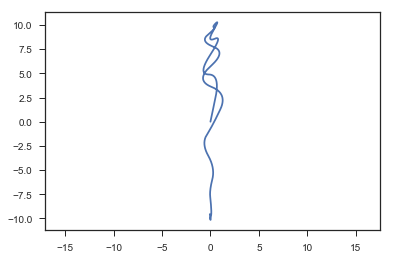

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t3.x, t3.y)
ax.set_aspect('equal', 'datalim')

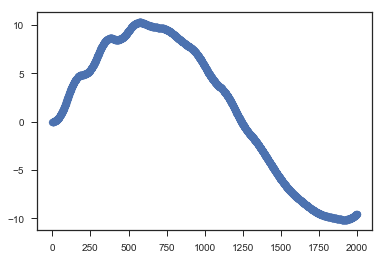

In [21]:
t3.reset_index(inplace = True)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y = t3.y, x = t3.reset_index().index)
#ax.set_aspect('equal', 'datalim')

In [63]:
# plot nnet predictions over the top
t3.loc[:,['simNum', 'timestep']] = t3.loc[:,['simNum', 'timestep']].astype(int).copy()

In [64]:
t3['count'] = t3.groupby(["simNum", "timestep"]).cumcount().copy()
sdf = t3.loc[(t3["count"] == 0) | (t3["count"] == 99), :].copy()
ss = sdf.pivot_table(index=['simNum', 'timestep'], columns = "count",aggfunc='first').copy()
ss.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in ss.columns]
ss.reset_index(inplace=True) 
ss.head()

,simNum,timestep,F_0,F_99,alpha_0,alpha_99,cost_0,cost_99,index_0,index_99,...,theta_dot_0,theta_dot_99,x_0,x_99,x_dot_0,x_dot_99,y_0,y_99,y_dot_0,y_dot_99
0,245,5,9635.961807,9635.961807,3.265285,3.265285,9.258072e+06,9.258072e+06,1274500,1274599,...,-0.283043,-0.236185,0.278064,0.560663,68.598739,-40.432381,9.383101,10.187193,118.590828,-38.096891
1,402,7,6245.333363,6245.333363,2.761806,2.761806,1.181853e+06,1.181853e+06,1790200,1790299,...,0.854273,-0.101263,0.374519,-0.265397,20.901698,-84.017895,9.739399,8.994136,-5.729908,-69.564641
2,419,12,5488.083399,5488.083399,0.569902,0.569902,6.871148e+06,6.871148e+06,3041900,3041999,...,-0.422248,1.504593,1.007213,-0.363086,-80.405530,-58.046827,1.246405,-1.331760,-166.807319,-89.939672
3,566,4,12895.739504,12895.739504,0.069957,0.069957,2.822735e+06,2.822735e+06,1056600,1056699,...,-0.290523,-0.283043,0.452728,0.278064,-86.073500,68.598739,8.576013,9.383101,-37.882880,118.590828
4,682,1,15454.071056,15454.071056,3.277403,3.277403,1.347777e+06,1.347777e+06,318200,318299,...,0.855175,-0.437955,0.512726,-0.167335,51.535135,-119.157059,2.436740,4.879996,243.275297,0.680895


In [65]:
ss["y_0"]

0      9.383101
1      9.739399
2      1.246405
3      8.576013
4      2.436740
5      4.879996
6     -1.331760
7      6.914967
8     -3.512255
9      0.000000
10    -9.012454
11    -9.794115
12    10.187193
13     7.755765
14     8.994136
15    -7.745884
16   -10.129802
17     5.758900
18    -5.936346
19     3.599702
Name: y_0, dtype: float64

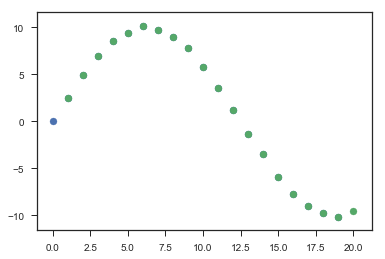

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ss.sort_values("timestep", inplace=True)
ss.reset_index(inplace = True, drop = True)
ax.scatter(y = ss.y_0, x = ss.timestep)
ax.scatter(y = ss.y_99, x = ss.timestep + 1)

In [67]:
# predict

# clean data
ss = ss.drop(columns=['F_99', 'alpha_99', 
                               'tau_99'])
ss=ss.rename(columns = {'F_0':'F', 
                                 "alpha_0": "alpha", 
                                 "tau_0": "tau"})

In [68]:
# convert to Fx and Fy
ss["Fx"] = ss.F * np.cos(ss.alpha)
ss["Fy"] = ss.F * np.sin(ss.alpha)

# make dataset
XTEST_traj = ss.loc[:, ["x_0", "y_0", "phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"]]

YTEST_traj = ss.loc[:, ["Fx", "Fy", "tau", "x_dot_99", "y_dot_99", 
                    "phi_dot_99", "theta_dot_99"] ]


# scale
XTEST_traj_sc = scalerX.transform(XTEST_traj)
YTEST_traj_sc = scalerY.transform(YTEST_traj)


In [69]:
# predict
sc_preds = model.predict(XTEST_traj_sc)

In [70]:
# rescale
preds_unsc = scalerY.inverse_transform(sc_preds)

In [71]:
# show predictions
pd.DataFrame(preds_unsc, columns = YTEST_traj.columns).head()

,Fx,Fy,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99
0,12126.081055,8050.171387,-10029.873047,53.868492,237.170654,1.541502,0.785526
1,-15059.252930,-2079.096436,-25311.675781,-117.349625,-0.795834,1.398492,-0.384520
2,18455.683594,-1374.099243,-8724.718750,135.285004,202.076401,0.852749,0.219016
3,-16893.603516,-83.097160,-20624.888672,-84.017601,-39.198914,1.219913,-0.217989
4,12766.820312,727.470032,-18228.125000,71.056755,116.459343,1.001466,-0.299789


In [72]:
# show actual
YTEST_traj.head()

,Fx,Fy,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99
0,12226.135431,8264.292820,-8987.031521,51.535135,243.275297,1.529641,0.855175
1,-15311.769291,-2092.375055,-25225.099141,-119.157059,0.680895,1.344528,-0.437955
2,18486.403445,-1138.078368,-7858.535506,133.181748,203.860449,0.804182,0.252205
3,-17169.492938,-128.344125,-20530.429358,-86.073500,-37.882880,1.168218,-0.290523
4,12864.196744,901.409728,-17792.146033,68.598739,118.590828,0.983702,-0.283043


In [73]:
XTEST_traj.head()

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
0,0.000000,0.000000,3.926991,0.785398,0.512726,2.436740,3.942761,0.787673,0.000100,0.000100,0.000000,0.000000
1,0.512726,2.436740,3.942761,0.787673,-0.167335,4.879996,3.971964,0.781283,51.535135,243.275297,1.529641,0.855175
2,-0.167335,4.879996,3.971964,0.781283,-0.016540,6.914967,3.992774,0.790993,-119.157059,0.680895,1.344528,-0.437955
3,-0.016540,6.914967,3.992774,0.790993,0.452728,8.576013,4.012850,0.781938,133.181748,203.860449,0.804182,0.252205
4,0.452728,8.576013,4.012850,0.781938,0.278064,9.383101,4.034389,0.778132,-86.073500,-37.882880,1.168218,-0.290523


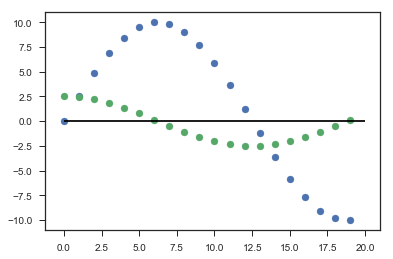

In [74]:
freq = 1/25
timesteps = np.arange(0, 20)

goal = 10*np.sin(2*np.pi*freq * timesteps)

# goal deriv
goalD = 4/5*np.pi *np.cos(2*np.pi*freq * timesteps)


plt.scatter(y = goal, x = timesteps)
plt.scatter(y = goalD, x = timesteps)
plt.hlines(y = 0, xmin = 0, xmax = 20)
#plt.scatter(y = ss.y_0, x = ss.timestep)

In [75]:
# goal deriv
goalD = 4/5*np.pi *np.cos(2*np.pi*freq * timesteps)

In [76]:
XTEST_traj.head()

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
0,0.000000,0.000000,3.926991,0.785398,0.512726,2.436740,3.942761,0.787673,0.000100,0.000100,0.000000,0.000000
1,0.512726,2.436740,3.942761,0.787673,-0.167335,4.879996,3.971964,0.781283,51.535135,243.275297,1.529641,0.855175
2,-0.167335,4.879996,3.971964,0.781283,-0.016540,6.914967,3.992774,0.790993,-119.157059,0.680895,1.344528,-0.437955
3,-0.016540,6.914967,3.992774,0.790993,0.452728,8.576013,4.012850,0.781938,133.181748,203.860449,0.804182,0.252205
4,0.452728,8.576013,4.012850,0.781938,0.278064,9.383101,4.034389,0.778132,-86.073500,-37.882880,1.168218,-0.290523


In [104]:
# create input data
theta_goal = np.pi / 4
phi_goal = np.pi / 4 + np.pi

timstep = 0
inputData = np.array([0, goal[timstep], phi_goal, theta_goal, 
             0, goal[timstep + 1], phi_goal, theta_goal,
            0.0001, 0.0001, 0, 0 ]).reshape(1,-1)

#inputData2 = scalerX.transform(XTEST_traj.head())
inputData2 = scalerX.transform(inputData)
pd.DataFrame(inputData2, columns = XTEST_traj.columns)

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
0,-0.011641,-0.000484,-1.120669,0.014353,-0.001446,0.31444,-1.126921,-0.047676,0.000451,0.000015,-0.105981,-0.008044


In [105]:
nnpreds2 = pd.DataFrame(scalerY.inverse_transform(model.predict(inputData2)), columns = YTEST_traj.columns)

In [106]:
newDF = pd.concat([pd.DataFrame(inputData, columns = XTEST_traj.columns), nnpreds2], axis = 1)

In [107]:
for timstep in np.arange(0,16): 
    newDF = newDF.append(newDF.iloc[timstep,:]).reset_index(drop = True)
    newDF.loc[timstep+1, ['x_0', 'y_0', 'phi_0', 'theta_0']] = np.array(newDF.loc[timstep, ['x_99', 'y_99', 'phi_99', 'theta_99']])
    newDF.loc[timstep+1, ['x_99', 'y_99', 'phi_99', 'theta_99']] = np.array([0, goal[timstep + 2], phi_goal, theta_goal])
    newDF.loc[timstep+1, ['x_dot_0', 'y_dot_0', 'phi_dot_0', 'theta_dot_0']] = np.array(newDF.loc[timstep, ['x_dot_99', 'y_dot_99', 'phi_dot_99', 'theta_dot_99']])
    inputData = np.array(newDF.loc[timstep + 1,list(XTEST_traj.columns)]).reshape(1,-1)
    inputData2 = scalerX.transform(inputData)

    newDF.loc[timstep + 1, list(YTEST_traj.columns)] = scalerY.inverse_transform(model.predict(inputData2))

In [108]:
newDF

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,Fx,Fy,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99
0,0.0,0.000000,3.926991,0.785398,0.0,2.486899,3.926991,0.785398,0.000100,0.000100,0.000000,0.000000,10350.580078,10866.174805,-6544.086914,-2.848437,245.378876,0.888766,0.321621
1,0.0,2.486899,3.926991,0.785398,0.0,4.817537,3.926991,0.785398,-2.848437,245.378876,0.888766,0.321621,-8667.095703,-9352.234375,-419.850464,4.795412,-9.356008,-0.812352,-0.800418
2,0.0,4.817537,3.926991,0.785398,0.0,6.845471,3.926991,0.785398,4.795412,-9.356008,-0.812352,-0.800418,8939.199219,9715.206055,-728.060608,-2.697180,206.810623,0.909731,0.796633
3,0.0,6.845471,3.926991,0.785398,0.0,8.443279,3.926991,0.785398,-2.697180,206.810623,0.909731,0.796633,-8532.167969,-9152.760742,-734.002136,4.361343,-43.362701,-0.804687,-0.806738
4,0.0,8.443279,3.926991,0.785398,0.0,9.510565,3.926991,0.785398,4.361343,-43.362701,-0.804687,-0.806738,7900.261230,8511.390625,-36.777771,-1.290929,146.054977,0.805644,0.754020
5,0.0,9.510565,3.926991,0.785398,0.0,9.980267,3.926991,0.785398,-1.290929,146.054977,0.805644,0.754020,-8307.736328,-8702.226562,-217.158417,2.674360,-94.777626,-0.766801,-0.719674
6,0.0,9.980267,3.926991,0.785398,0.0,9.822873,3.926991,0.785398,2.674360,-94.777626,-0.766801,-0.719674,7261.970215,7582.611816,249.510895,0.542966,76.350525,0.717364,0.697592
7,0.0,9.822873,3.926991,0.785398,0.0,9.048271,3.926991,0.785398,0.542966,76.350525,0.717364,0.697592,-7887.696289,-7977.561523,-77.999451,-0.131139,-148.858704,-0.704989,-0.644760
8,0.0,9.048271,3.926991,0.785398,0.0,7.705132,3.926991,0.785398,-0.131139,-148.858704,-0.704989,-0.644760,7054.902344,6981.511719,158.776093,2.832546,12.872025,0.659452,0.641932
9,0.0,7.705132,3.926991,0.785398,0.0,5.877853,3.926991,0.785398,2.832546,12.872025,0.659452,0.641932,-7252.105957,-6943.079590,-387.374451,-3.698961,-190.325012,-0.613026,-0.581748


In [109]:
# convert to F and alpha 

# calculate alpha
def quadrant(Fx, Fy):
    if (Fx >= 0) & (Fy >= 0):
        q = 1
    elif (Fx < 0) & (Fy >= 0):
        q = 2
    elif (Fx < 0) & (Fy < 0):
        q = 3
    elif (Fx >= 0) & (Fy < 0):
        q = 4
    else:
        q = 999999
    return(q)


def angleCalc(Fx, Fy, q):
    fx = np.abs(Fx)
    fy = np.abs(Fy)
    
    if q == 1:
        alpha = np.arctan(fy/fx)
    elif q == 2:
        alpha = np.pi - np.arctan(fy/fx)
    elif q == 3: 
        alpha = np.pi + np.arctan(fy/fx)
    elif q == 4:
        alpha = (2*np.pi) - np.arctan(fy/fx)
    return(alpha)

def AlphaAndForceCalc (df = newDF, FX_name = "Fx", FY_name = "Fy"):
    quadrantNum = [quadrant(fx, fy) for fx,fy in zip(df[FX_name], df[FY_name])]
    df["alphaCalc"] = [angleCalc(fx, fy, q) for fx, fy, q in zip(df[FX_name], df[FY_name], quadrantNum)]
    df["F"] = np.sqrt(df[FX_name]**2 + df[FY_name]**2)
    return(df)

# calculate F

df2 = AlphaAndForceCalc()

In [110]:
df2

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,...,theta_dot_0,Fx,Fy,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99,alphaCalc,F
0,0.0,0.000000,3.926991,0.785398,0.0,2.486899,3.926991,0.785398,0.000100,0.000100,...,0.000000,10350.580078,10866.174805,-6544.086914,-2.848437,245.378876,0.888766,0.321621,0.809695,15006.940489
1,0.0,2.486899,3.926991,0.785398,0.0,4.817537,3.926991,0.785398,-2.848437,245.378876,...,0.321621,-8667.095703,-9352.234375,-419.850464,4.795412,-9.356008,-0.812352,-0.800418,3.964995,12750.797455
2,0.0,4.817537,3.926991,0.785398,0.0,6.845471,3.926991,0.785398,4.795412,-9.356008,...,-0.800418,8939.199219,9715.206055,-728.060608,-2.697180,206.810623,0.909731,0.796633,0.826973,13202.064663
3,0.0,6.845471,3.926991,0.785398,0.0,8.443279,3.926991,0.785398,-2.697180,206.810623,...,0.796633,-8532.167969,-9152.760742,-734.002136,4.361343,-43.362701,-0.804687,-0.806738,3.962068,12512.830193
4,0.0,8.443279,3.926991,0.785398,0.0,9.510565,3.926991,0.785398,4.361343,-43.362701,...,-0.806738,7900.261230,8511.390625,-36.777771,-1.290929,146.054977,0.805644,0.754020,0.822618,11612.833327
5,0.0,9.510565,3.926991,0.785398,0.0,9.980267,3.926991,0.785398,-1.290929,146.054977,...,0.754020,-8307.736328,-8702.226562,-217.158417,2.674360,-94.777626,-0.766801,-0.719674,3.950178,12031.094299
6,0.0,9.980267,3.926991,0.785398,0.0,9.822873,3.926991,0.785398,2.674360,-94.777626,...,-0.719674,7261.970215,7582.611816,249.510895,0.542966,76.350525,0.717364,0.697592,0.806995,10499.152983
7,0.0,9.822873,3.926991,0.785398,0.0,9.048271,3.926991,0.785398,0.542966,76.350525,...,0.697592,-7887.696289,-7977.561523,-77.999451,-0.131139,-148.858704,-0.704989,-0.644760,3.932655,11218.611349
8,0.0,9.048271,3.926991,0.785398,0.0,7.705132,3.926991,0.785398,-0.131139,-148.858704,...,-0.644760,7054.902344,6981.511719,158.776093,2.832546,12.872025,0.659452,0.641932,0.780170,9925.379235
9,0.0,7.705132,3.926991,0.785398,0.0,5.877853,3.926991,0.785398,2.832546,12.872025,...,0.641932,-7252.105957,-6943.079590,-387.374451,-3.698961,-190.325012,-0.613026,-0.581748,3.905224,10039.890189


In [111]:
df2.to_csv(os.path.join(dataOutput, "predictPartPath_allCols.csv"), index = False)

In [112]:
# make smaller version
df2.drop(["Fx", "Fy"], axis = 1, inplace = True)
df2.rename({"alphaCalc": "alpha"}, axis = 1, inplace = True)
df2

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99,alpha,F
0,0.0,0.000000,3.926991,0.785398,0.0,2.486899,3.926991,0.785398,0.000100,0.000100,0.000000,0.000000,-6544.086914,-2.848437,245.378876,0.888766,0.321621,0.809695,15006.940489
1,0.0,2.486899,3.926991,0.785398,0.0,4.817537,3.926991,0.785398,-2.848437,245.378876,0.888766,0.321621,-419.850464,4.795412,-9.356008,-0.812352,-0.800418,3.964995,12750.797455
2,0.0,4.817537,3.926991,0.785398,0.0,6.845471,3.926991,0.785398,4.795412,-9.356008,-0.812352,-0.800418,-728.060608,-2.697180,206.810623,0.909731,0.796633,0.826973,13202.064663
3,0.0,6.845471,3.926991,0.785398,0.0,8.443279,3.926991,0.785398,-2.697180,206.810623,0.909731,0.796633,-734.002136,4.361343,-43.362701,-0.804687,-0.806738,3.962068,12512.830193
4,0.0,8.443279,3.926991,0.785398,0.0,9.510565,3.926991,0.785398,4.361343,-43.362701,-0.804687,-0.806738,-36.777771,-1.290929,146.054977,0.805644,0.754020,0.822618,11612.833327
5,0.0,9.510565,3.926991,0.785398,0.0,9.980267,3.926991,0.785398,-1.290929,146.054977,0.805644,0.754020,-217.158417,2.674360,-94.777626,-0.766801,-0.719674,3.950178,12031.094299
6,0.0,9.980267,3.926991,0.785398,0.0,9.822873,3.926991,0.785398,2.674360,-94.777626,-0.766801,-0.719674,249.510895,0.542966,76.350525,0.717364,0.697592,0.806995,10499.152983
7,0.0,9.822873,3.926991,0.785398,0.0,9.048271,3.926991,0.785398,0.542966,76.350525,0.717364,0.697592,-77.999451,-0.131139,-148.858704,-0.704989,-0.644760,3.932655,11218.611349
8,0.0,9.048271,3.926991,0.785398,0.0,7.705132,3.926991,0.785398,-0.131139,-148.858704,-0.704989,-0.644760,158.776093,2.832546,12.872025,0.659452,0.641932,0.780170,9925.379235
9,0.0,7.705132,3.926991,0.785398,0.0,5.877853,3.926991,0.785398,2.832546,12.872025,0.659452,0.641932,-387.374451,-3.698961,-190.325012,-0.613026,-0.581748,3.905224,10039.890189


In [113]:
df2.columns

Index(['x_0', 'y_0', 'phi_0', 'theta_0', 'x_99', 'y_99', 'phi_99', 'theta_99',
       'x_dot_0', 'y_dot_0', 'phi_dot_0', 'theta_dot_0', 'tau', 'x_dot_99',
       'y_dot_99', 'phi_dot_99', 'theta_dot_99', 'alpha', 'F'],
      dtype='object')

In [114]:
# change column order

ddf1 = df2.pop("alpha")
df2['alpha'] = ddf1
df1 = df2.pop('tau')
df2['tau'] = df1
df2

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99,F,alpha,tau
0,0.0,0.000000,3.926991,0.785398,0.0,2.486899,3.926991,0.785398,0.000100,0.000100,0.000000,0.000000,-2.848437,245.378876,0.888766,0.321621,15006.940489,0.809695,-6544.086914
1,0.0,2.486899,3.926991,0.785398,0.0,4.817537,3.926991,0.785398,-2.848437,245.378876,0.888766,0.321621,4.795412,-9.356008,-0.812352,-0.800418,12750.797455,3.964995,-419.850464
2,0.0,4.817537,3.926991,0.785398,0.0,6.845471,3.926991,0.785398,4.795412,-9.356008,-0.812352,-0.800418,-2.697180,206.810623,0.909731,0.796633,13202.064663,0.826973,-728.060608
3,0.0,6.845471,3.926991,0.785398,0.0,8.443279,3.926991,0.785398,-2.697180,206.810623,0.909731,0.796633,4.361343,-43.362701,-0.804687,-0.806738,12512.830193,3.962068,-734.002136
4,0.0,8.443279,3.926991,0.785398,0.0,9.510565,3.926991,0.785398,4.361343,-43.362701,-0.804687,-0.806738,-1.290929,146.054977,0.805644,0.754020,11612.833327,0.822618,-36.777771
5,0.0,9.510565,3.926991,0.785398,0.0,9.980267,3.926991,0.785398,-1.290929,146.054977,0.805644,0.754020,2.674360,-94.777626,-0.766801,-0.719674,12031.094299,3.950178,-217.158417
6,0.0,9.980267,3.926991,0.785398,0.0,9.822873,3.926991,0.785398,2.674360,-94.777626,-0.766801,-0.719674,0.542966,76.350525,0.717364,0.697592,10499.152983,0.806995,249.510895
7,0.0,9.822873,3.926991,0.785398,0.0,9.048271,3.926991,0.785398,0.542966,76.350525,0.717364,0.697592,-0.131139,-148.858704,-0.704989,-0.644760,11218.611349,3.932655,-77.999451
8,0.0,9.048271,3.926991,0.785398,0.0,7.705132,3.926991,0.785398,-0.131139,-148.858704,-0.704989,-0.644760,2.832546,12.872025,0.659452,0.641932,9925.379235,0.780170,158.776093
9,0.0,7.705132,3.926991,0.785398,0.0,5.877853,3.926991,0.785398,2.832546,12.872025,0.659452,0.641932,-3.698961,-190.325012,-0.613026,-0.581748,10039.890189,3.905224,-387.374451


In [115]:
df2.to_csv(os.path.join(dataOutput, "predictPartPath_small.csv"), index = False)

In [116]:
dataOutput

'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput'

In [530]:
YTEST_traj.head()

,Fx,Fy,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99
0,12226.135431,8264.292820,-8987.031521,51.535135,243.275297,1.529641,0.855175
1,-15311.769291,-2092.375055,-25225.099141,-119.157059,0.680895,1.344528,-0.437955
2,18486.403445,-1138.078368,-7858.535506,133.181748,203.860449,0.804182,0.252205
3,-17169.492938,-128.344125,-20530.429358,-86.073500,-37.882880,1.168218,-0.290523
4,12864.196744,901.409728,-17792.146033,68.598739,118.590828,0.983702,-0.283043


In [541]:
newDF = newDF.loc[0:YTEST_traj.shape[0], YTEST_traj.columns]

newDF.head()

,Fx,Fy,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99
0,10350.580078,10866.174805,-6544.086914,-2.848437,245.378876,0.888766,0.321621
1,-8667.095703,-9352.234375,-419.850464,4.795412,-9.356008,-0.812352,-0.800418
2,8939.199219,9715.206055,-728.060608,-2.697180,206.810623,0.909731,0.796633
3,-8532.167969,-9152.760742,-734.002136,4.361343,-43.362701,-0.804687,-0.806738
4,7900.261230,8511.390625,-36.777771,-1.290929,146.054977,0.805644,0.754020


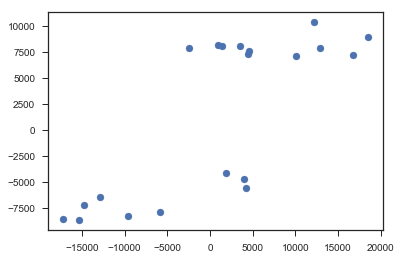

In [534]:
plt.scatter(YTEST_traj.Fx, newDF.Fx)

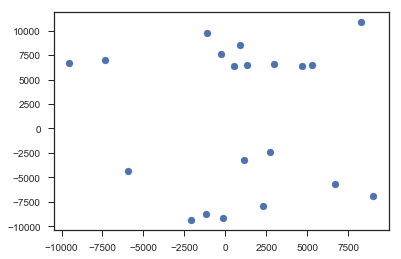

In [537]:
plt.scatter(YTEST_traj.Fy, newDF.Fy)

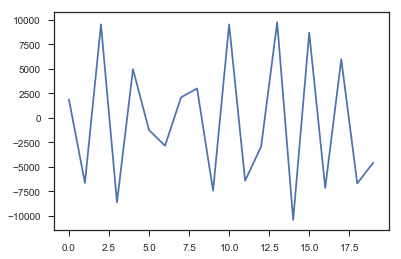

In [538]:
plt.plot(YTEST_traj.Fx- newDF.Fx)

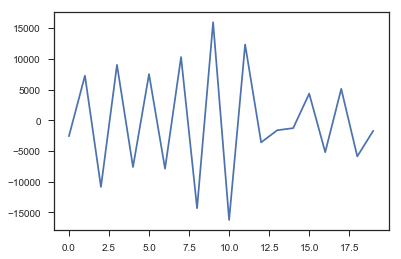

In [539]:
plt.plot(YTEST_traj.Fy- newDF.Fy)

In [ ]:
# convert Fx and Fy back to F and alpha

In [ ]:
# calculate mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [ ]:
for ii in range(len(nms)):
    #np.sqrt(mean_squared_error(Ytest.iloc[0:1000,ii], nnpreds_unscaled[:,ii]))
    print(r2_score(Ytest.iloc[0:1000,ii], nnpreds_unscaled[:,ii]), nms[ii])

In [ ]:
plt.scatter(nnpreds_unscaled[:,ii],Ytest.iloc[0:1000,ii]-  nnpreds_unscaled[:,ii])

In [ ]:
# predict on holdout data (novel initial conditions)
nnpreds = model.predict(XTEST_scaled)

nnpreds_unscaled = scalerY.inverse_transform(nnpreds)

In [ ]:
XTEST_scaled.shape

In [ ]:
YTEST.shape

In [ ]:
plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = Y.columns

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
#cmaplist[0:2] = np.repeat((0.0,0.0,0.0,0.0), 2).reshape(-1,4)
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
#cmaplist[:,0:3] = np.transpose(np.vstack([np.linspace(1, 0, 256), np.linspace(1, 0, 256), np.linspace(1, 0, 256)]))
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(Y.columns)):
    # read in image
    
    try:
        axs[ii].hexbin(y = YTEST.iloc[:,ii],x = nnpreds_unscaled[:,ii], gridsize = 150, cmap = cmap)
        axs[ii].set_xlabel("Predicted Value\n(unscaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(unscaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(YTEST.iloc[:,ii], YTEST.iloc[:,ii], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass

# fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy_hexbin_loadedModel.png"), dpi = 120, bbox_inches='tight')

In [ ]:
# residual plots
plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = Y.columns

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(Y.columns)):
    # read in image
    
    try:
        axs[ii].hexbin(y = YTEST.iloc[:,ii] - nnpreds_unscaled[:,ii],x = nnpreds_unscaled[:,ii], gridsize = 150, cmap = cmap)
        axs[ii].set_xlabel("Predicted Value\n(unscaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Residuals\n(unscaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].hlines(y = 0, xmin = np.min(nnpreds_unscaled[:,ii]), 
                       xmax = np.max(nnpreds_unscaled[:,ii]), linestyle =  "--", linewidth = 1)
    except:
        pass


In [ ]:
# see how many initial conditions are in the TEST Set


In [ ]:
XTEST.iloc[:, 0:4].drop_duplicates().shape

In [ ]:
X.iloc[:,0:4].drop_duplicates().shape

In [ ]:
df1 = pd.DataFrame({"A": [4,5,5,6,6,5,5], 
                   "B": [4,3,3,5,5,3,3], 
                   "C": [3,4,4,6,7,4,4], 
                   "D": [6,8,2,6,4,2,2]})
df1["NM"] = "df1"


df2 = pd.DataFrame({"A": [4,5,5], 
                   "B": [4,3,3], 
                   "C": [4,4,4], 
                   "D": [7,2,2]})

df2["NM"] = "df2"

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, on = ['A', 'B', 'C', 'D'], how = "inner")

In [ ]:
TestPreds = pd.DataFrame(nnpreds_unscaled, columns = Y.columns)
TestPreds.head()

In [ ]:
TestInput = pd.DataFrame(Xtest, columns = X.columns).reset_index(drop = True)
TestInput.head()

In [ ]:
# F will be the same in any quadrant

TestPreds["F"] = np.sqrt(TestPreds["Fx"]**2 + TestPreds["Fy"]**2)

# trainDF["Fx"] = trainDF.F * np.cos(trainDF.alpha)
# trainDF["Fy"] = trainDF.F * np.sin(trainDF.alpha)

In [ ]:
TestPreds.head()

In [ ]:
# calculate alpha
def quadrant(Fx, Fy):
    if (Fx >= 0) & (Fy >= 0):
        q = 1
    elif (Fx < 0) & (Fy >= 0):
        q = 2
    elif (Fx < 0) & (Fy < 0):
        q = 3
    elif (Fx >= 0) & (Fy < 0):
        q = 4
    else:
        q = 999999
    return(q)


def angleCalc(Fx, Fy, q):
    fx = np.abs(Fx)
    fy = np.abs(Fy)
    
    if q == 1:
        alpha = np.arctan(fy/fx)
    elif q == 2:
        alpha = np.pi - np.arctan(fy/fx)
    elif q == 3: 
        alpha = np.pi + np.arctan(fy/fx)
    elif q == 4:
        alpha = (2*np.pi) - np.arctan(fy/fx)
    return(alpha)


In [ ]:
TestPreds["quadrant"] = [quadrant(fx, fy) for fx,fy in zip(TestPreds["Fx"], TestPreds["Fy"])]

In [ ]:
TestPreds.head()

In [ ]:
TestPreds["alpha"] = [angleCalc(fx, fy, q) for fx, fy, q in zip(TestPreds["Fx"], TestPreds["Fy"], TestPreds["quadrant"])]

In [ ]:
TestPreds.head()

In [ ]:
TestPredsComb = pd.concat([TestPreds, TestInput], axis = 1)

In [ ]:
TestPredsComb.head()

In [ ]:
TestPredsComb.rename(index=str, columns={"F": "F_pred", "alpha": "alpha_pred", "tau":"tau_pred"}, inplace=True)

In [ ]:
TestPredsComb.head()

In [ ]:
TestPredsComb.drop(['Fx', 'Fy', "quadrant"], axis=1, inplace = True)
TestPredsComb.head()

In [ ]:
cols= ['x_0', 'y_0', 'phi_0', 'theta_0', 
       'x_dot_0', 'y_dot_0', 'phi_dot_0', 'theta_dot_0', 
       'F_pred', 'alpha_pred', 'tau_pred', 
      'x_99', 'y_99', 'phi_99', 'theta_99', 
      'x_dot_99', 'y_dot_99', 'phi_dot_99', 'theta_dot_99' ]

In [ ]:
tc2 = TestPredsComb.loc[:, cols]
tc2.head()

In [ ]:
tc2.rename(columns = {"x_dot_99": "x_dot_99_pred", 
                     "y_dot_99": "y_dot_99_pred", 
                     "theta_dot_99": "theta_dot_99_pred", 
                     "phi_dot_99": "phi_dot_99_pred"}, inplace = True)
tc2.head()

In [ ]:
tc2.to_csv(os.path.join(dataOutput, "NNpreds.csv"), index = False)

In [ ]:
tc2.shape

In [ ]:
Xtrain.shape

In [ ]:

tc_sm =  tc2.sample(n=1000, random_state = 902902)
tc_sm.to_csv(os.path.join(dataOutput, "NNpreds_small.csv"), index = False)

In [ ]:
# check alpha on trainDf
trainDF2["quadrant"] = [quadrant(fx, fy) for fx,fy in zip(trainDF2["Fx"], trainDF2["Fy"])]

trainDF2["alphaCalc"] = [angleCalc(fx, fy, q) for fx, fy, q in zip(trainDF2["Fx"], trainDF2["Fy"], trainDF2["quadrant"])]

In [ ]:
trainDF2.loc[:, ["alpha", "alphaCalc"]].head()

In [ ]:
plt.close("all")
fig, axs = plt.subplots(2,int(len(Y.columns)/2), figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = Y.columns

for ii in range(len(Y.columns)):
    # read in image
    
    try:
        axs[ii].scatter(y = Ytest.iloc[:,ii],x = nnpreds_unscaled[:,ii], s = 1, alpha = 0.1 )
        axs[ii].set_xlabel("Predicted Value (un-scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(un-scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(Ytest.iloc[:,ii], Ytest.iloc[:,ii], 'b')
    except:
        pass

    
fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy.png"), dpi = 120, bbox_inches='tight')

In [ ]:
Ytest.head()

In [ ]:
Xtest.head()

In [ ]:
# refref: idea - predict whole paths, rather than just the endpoint

In [ ]:
plt.close("all")
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = ["Fx", "Fy", "tau"]


# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
#cmaplist[0:2] = np.repeat((0.0,0.0,0.0,0.0), 2).reshape(-1,4)
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
#cmaplist[:,0:3] = np.transpose(np.vstack([np.linspace(1, 0, 256), np.linspace(1, 0, 256), np.linspace(1, 0, 256)]))
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(3):
    # read in image
    
    try:
        axs[ii].hexbin(y = Ytest_scaled[:,ii],x = nnpreds[:,ii], gridsize = 150, cmap = cmap)
        axs[ii].set_xlabel("Predicted Value (scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(Ytest_scaled[:,ii], Ytest_scaled[:,ii], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass

fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy_hexbin.png"), dpi = 120, bbox_inches='tight')

In [ ]:
bf2[['simNum', 'timestep']] = bf2[['simNum', 'timestep']].astype(int)

bf2['count'] = bf2.groupby(["simNum", "timestep"]).cumcount()

bf2.head()

bf2.tail()

sdf = bf2.loc[(bf2["count"] == 0) | (bf2["count"] == 99), :]
sdf.head()

ss = sdf.pivot_table(index='simNum', columns = "count",aggfunc='first')
ss.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in ss.columns]
ss["simNum"] = ss.index
ss.index.name = None
ss.head()

np.array(ss).shape

np.vstack([np.array(ss), np.array(ss)]).shape